In [1]:
#importing necessary dependencies
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

#importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

#Other libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Drumil\OneDrive - IIT Kanpur\Desktop\creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.shape

(284807, 31)

In [5]:
#checking the proportion of fraudulent and non-fraudulent transactions
print('No Frauds:', round(df['Class'].value_counts()[0]/len(df)*100,2), '% of dataset')
print('Frauds:   ', round(df['Class'].value_counts()[1]/len(df)*100,2), '% of dataset')

No Frauds: 99.83 % of dataset
Frauds:    0.17 % of dataset


## We observe that the dataset is highly imbalanced and most of the transactions are non-fraudulent. We need to balance our dataset in order to use our predictive models otherwise our models will overfit and the models will "assume" that most of the transactions are non-fraudulent.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud | 1: Fraud)')

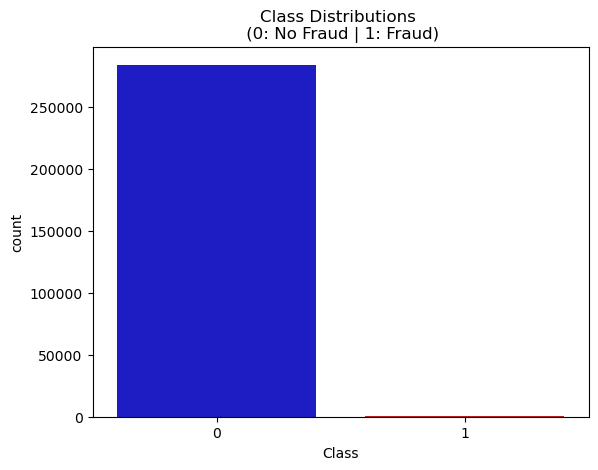

In [6]:
#plotting the imbalance in the dataset
colors = ['#0101DF','#DF0101']
sns.countplot(x = 'Class', data =df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud | 1: Fraud)')

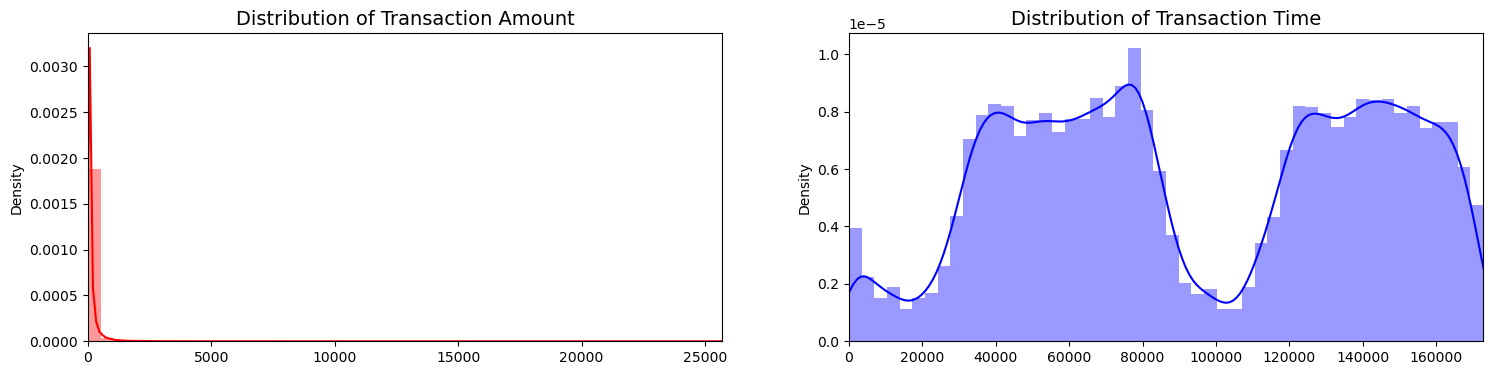

In [8]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
amount_val = df["Amount"].values
time_val = df["Time"].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are scaled!
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [11]:
X = df.drop('Class', axis =1)
y = df["Class"]
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle = False)

for train_index, test_index in sss.split(X,y):
    print('Train:', train_index, 'Test:', test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
    
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 108)
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
------------------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [12]:
df = df.sample(frac=1)
fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state =42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
171418,-0.279466,0.422221,2.157558,0.234527,-2.349269,0.279882,0.677326,-1.884114,1.045810,-0.728830,...,-0.211693,0.261646,0.980601,-0.173103,0.180689,0.636323,1.013992,-0.142381,-0.096461,0
12108,-0.293440,-0.747730,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,...,0.996745,-2.336111,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,1
69322,3.772375,-0.368002,0.560947,-0.908544,0.748392,1.641358,-1.010777,0.102756,0.020231,0.045166,...,0.462218,0.133720,0.083841,-0.349511,0.594746,0.556509,-0.365921,0.005819,0.068703,0
102782,-0.033676,-0.191908,1.232604,-0.548931,1.087873,0.894082,-1.433055,-0.356797,-0.717492,0.003167,...,-0.576274,-0.448671,-0.517568,0.012833,0.699217,0.527258,-0.322607,0.080805,0.035427,1
239501,3.007895,0.768888,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,...,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


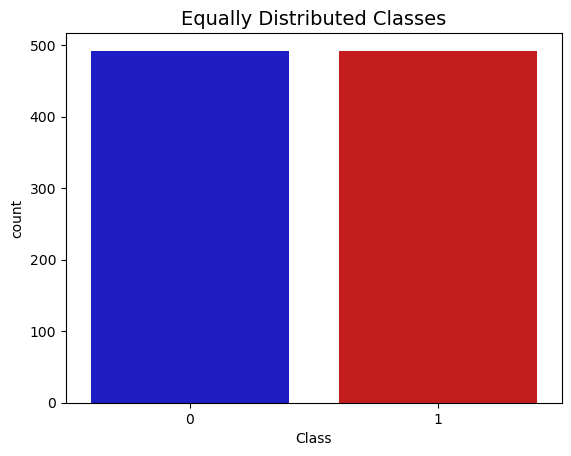

In [13]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot(x = 'Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

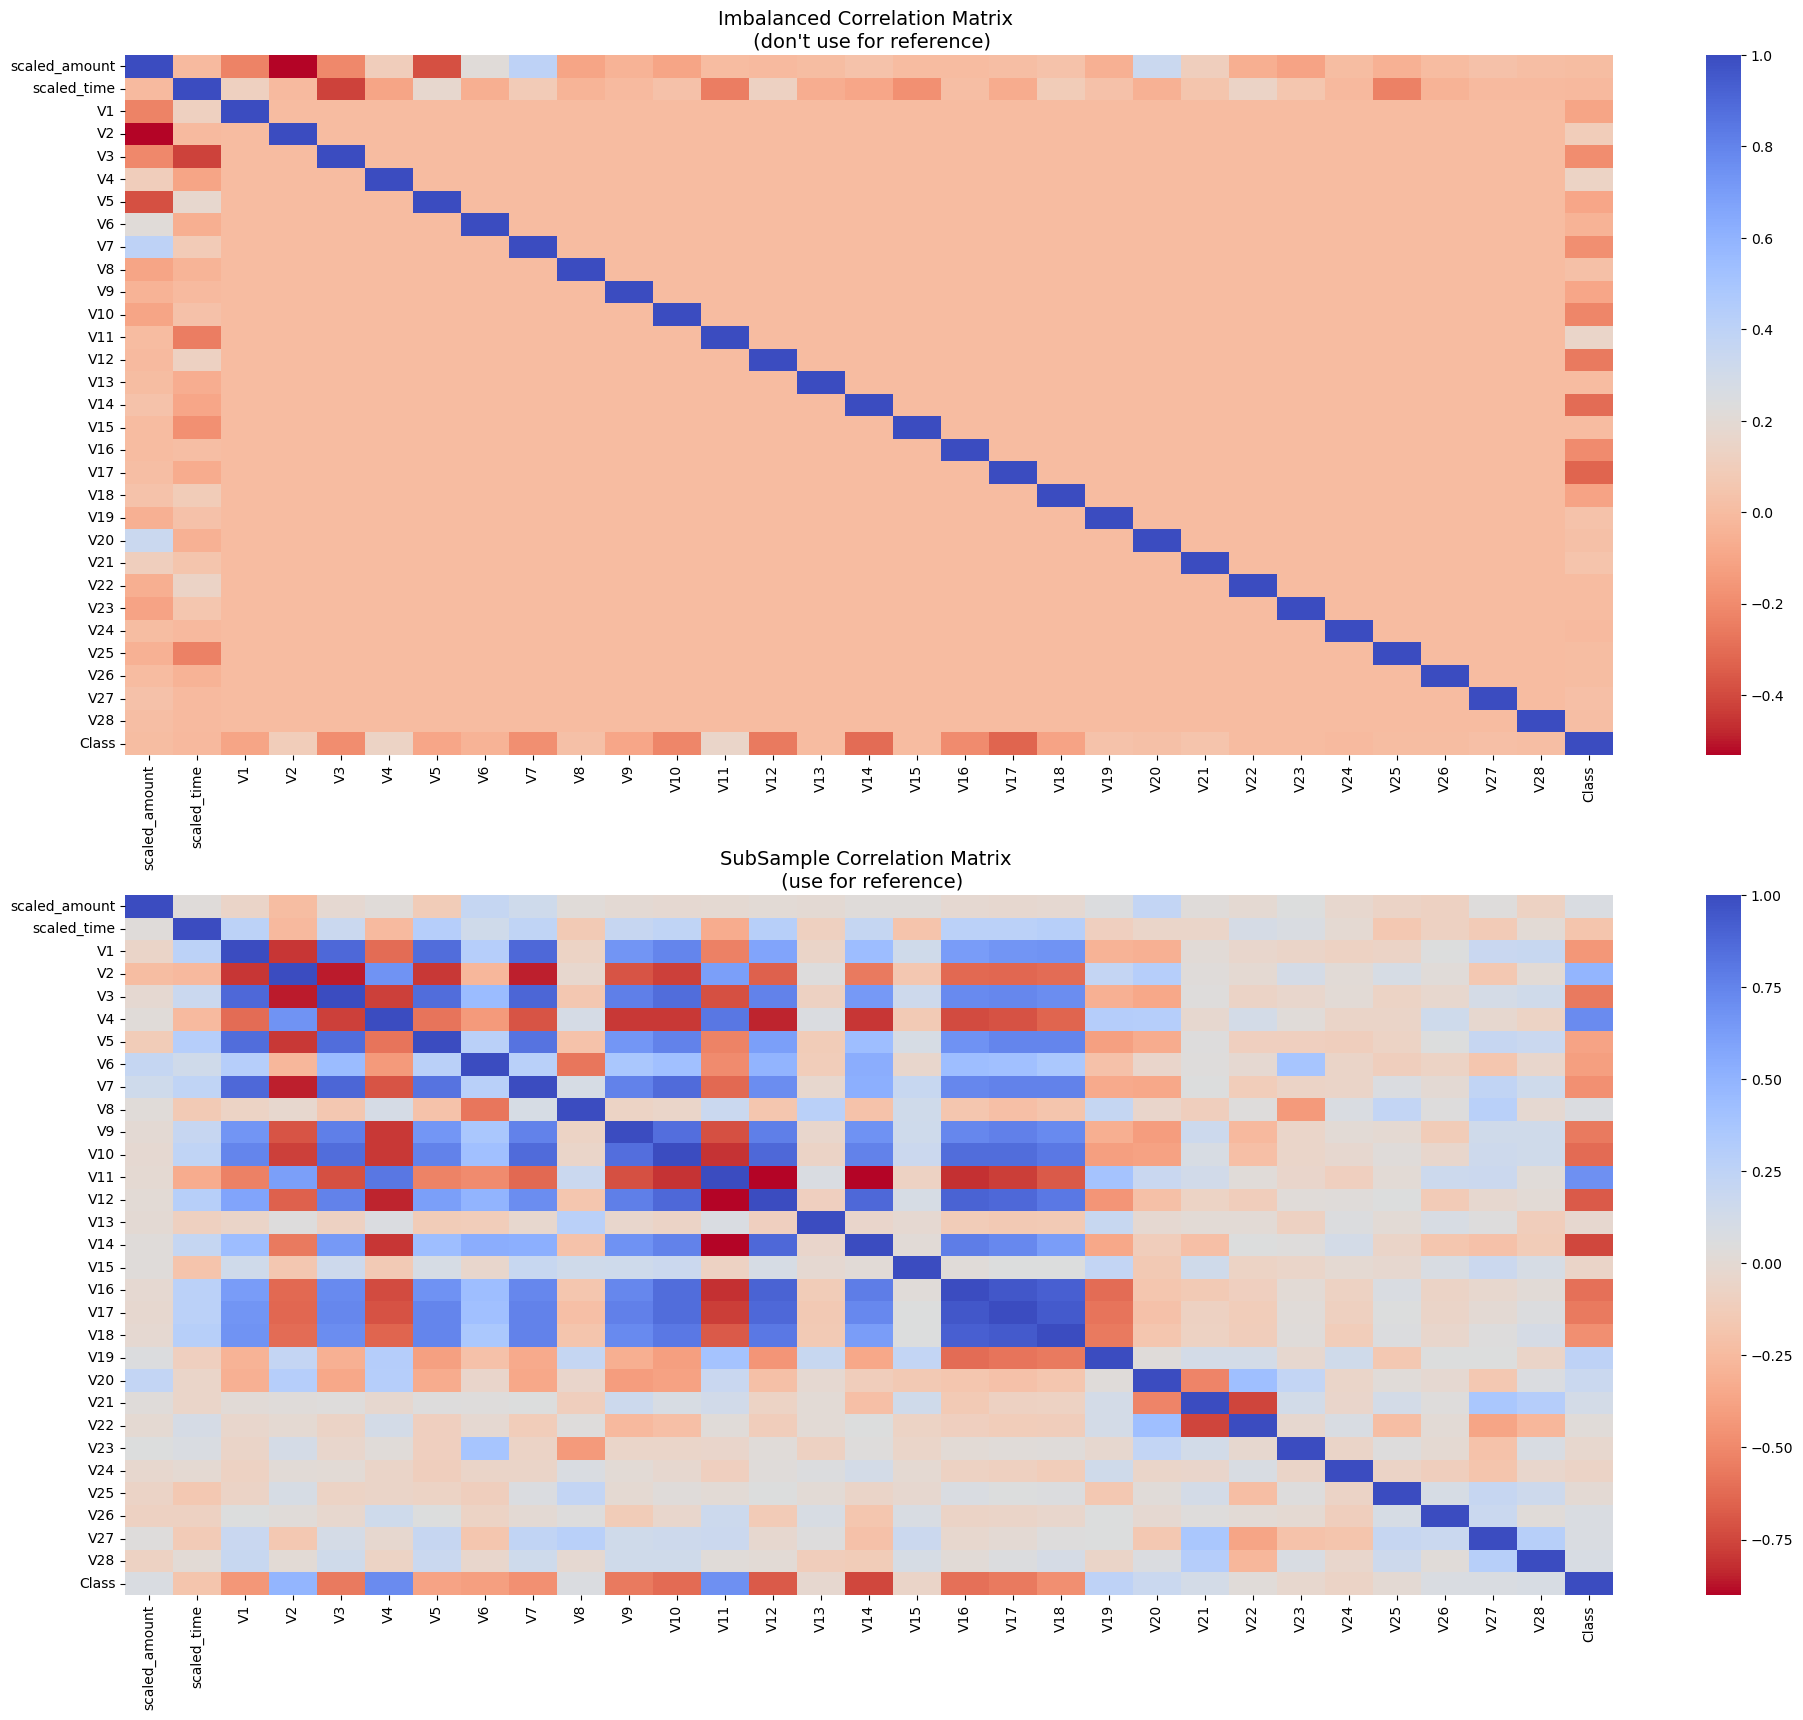

In [14]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

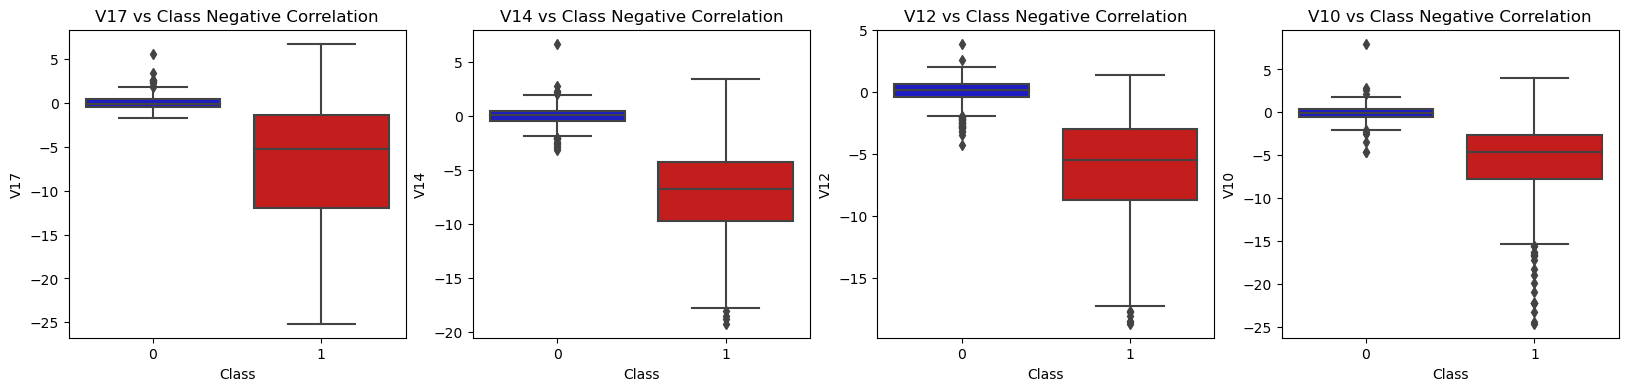

In [15]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

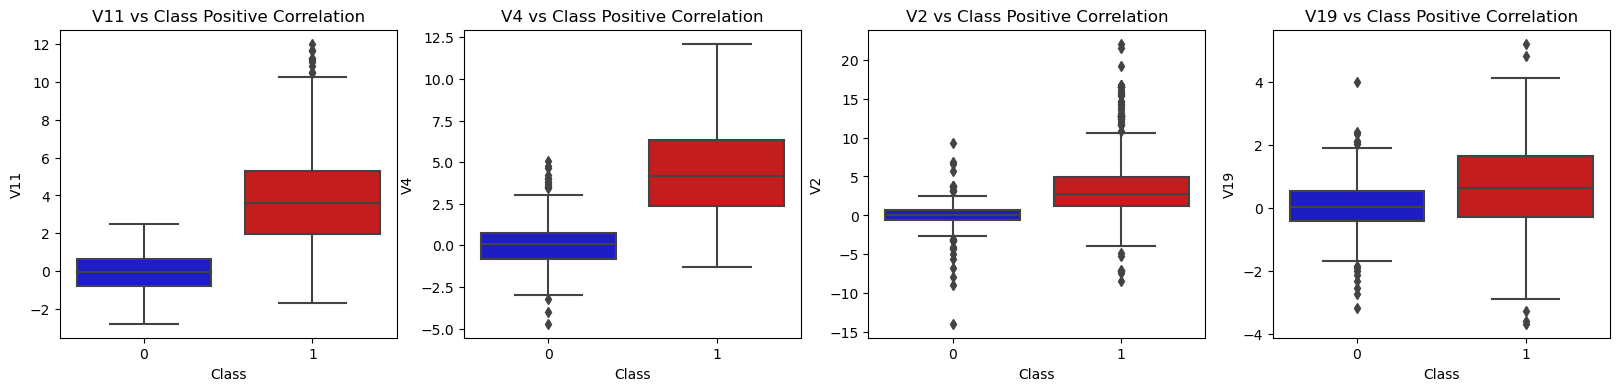

In [16]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

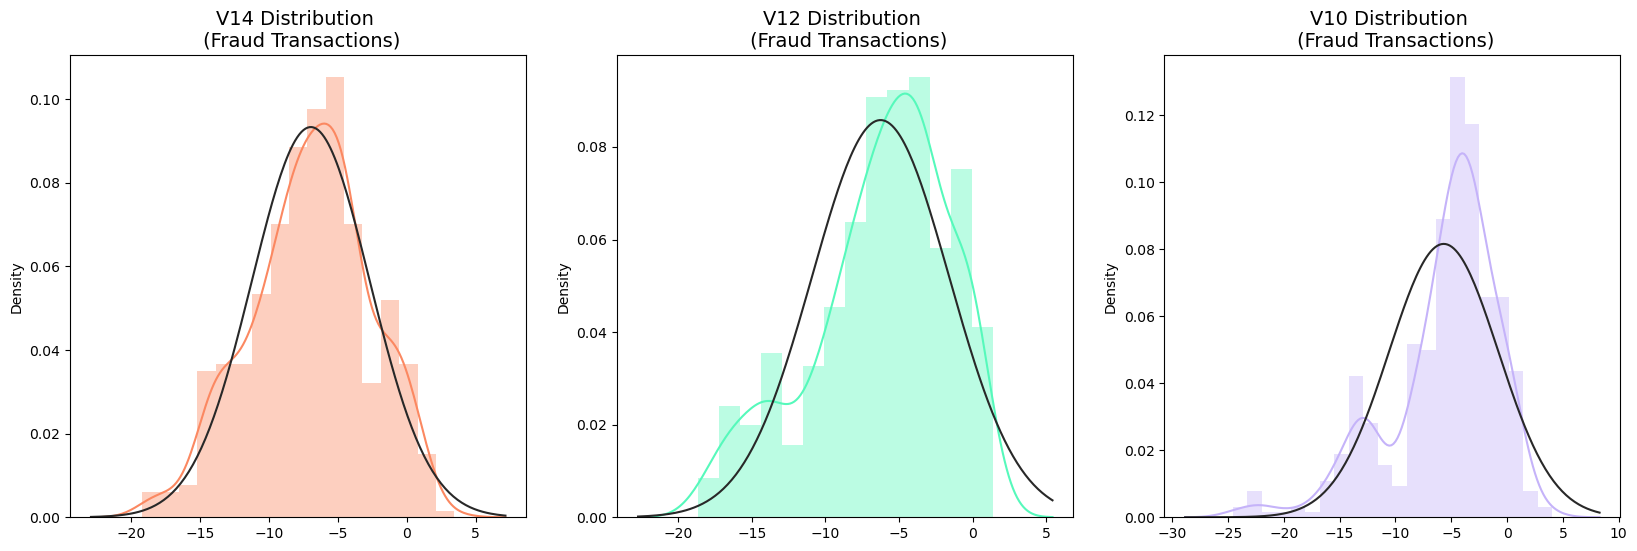

In [17]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [18]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.8220867423816, -18.0499976898594, -18.4937733551053, -19.2143254902614]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.6837146333443, -18.5536970096458, -18.0475965708216]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-14.9246547735487, -22.187088

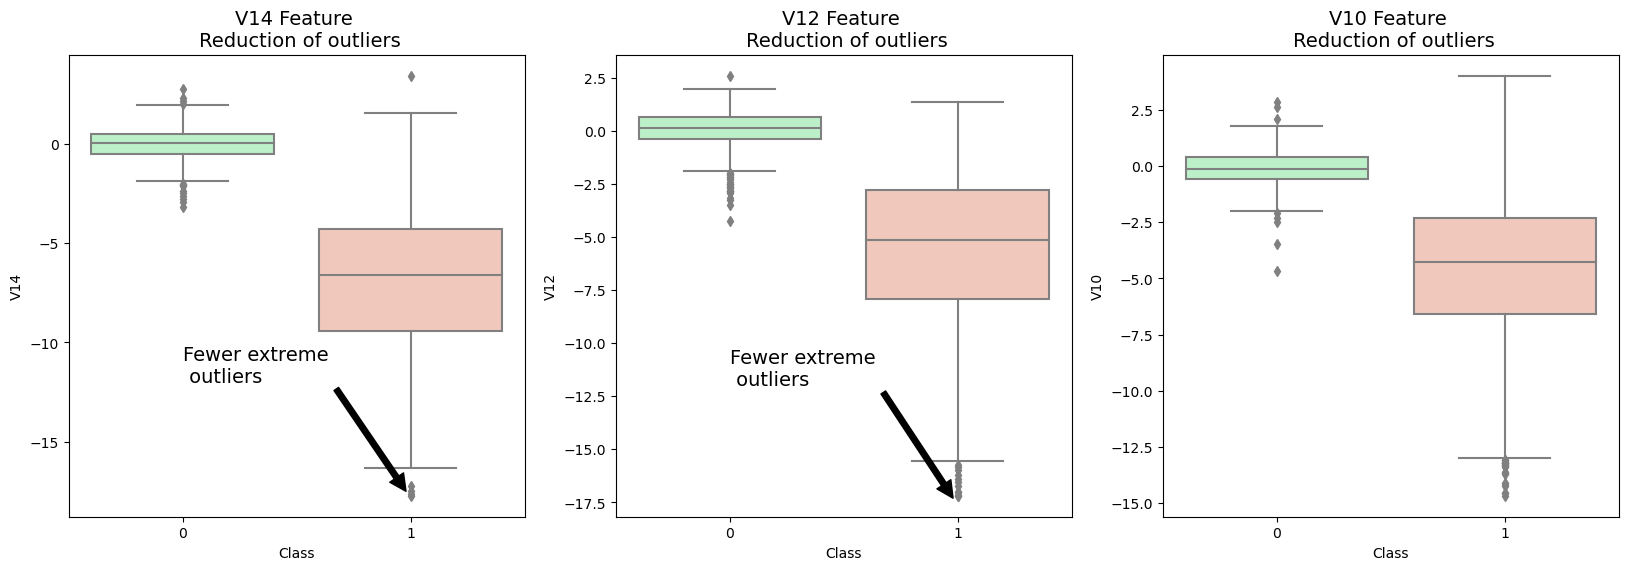

In [19]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [20]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 5.2 s
PCA took 0.0 s
Truncated SVD took 0.01 s


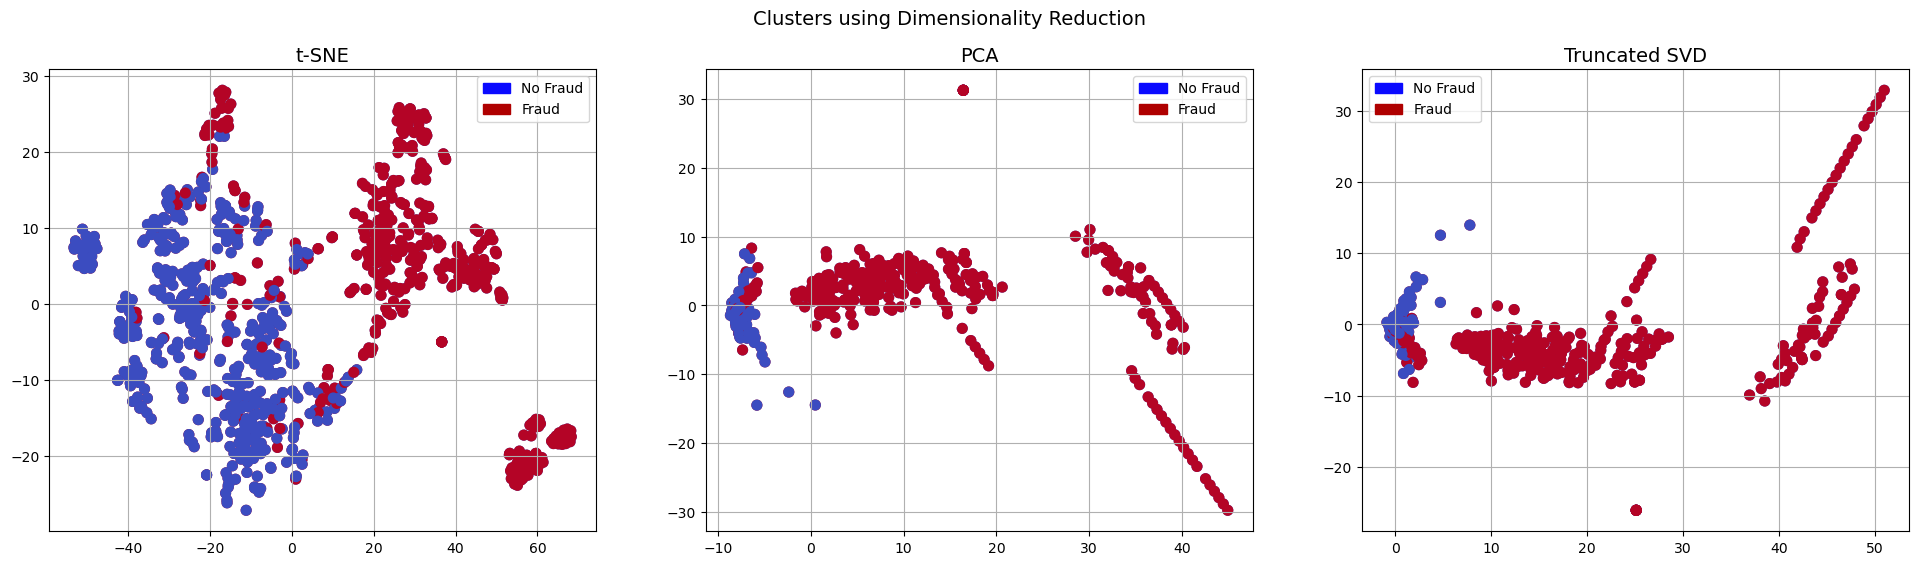

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [22]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [23]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBClassifier":XGBClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    
}

In [28]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor


In [31]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, 
          "Has a Accuracy of", round(training_score.mean(), 2) * 100, "%" )

Classifiers:  LogisticRegression Has a Accuracy of 93.0 %
Classifiers:  KNeighborsClassifier Has a Accuracy of 93.0 %
Classifiers:  SVC Has a Accuracy of 92.0 %
Classifiers:  DecisionTreeClassifier Has a Accuracy of 90.0 %
Classifiers:  XGBClassifier Has a Accuracy of 92.0 %
Classifiers:  RandomForestClassifier Has a Accuracy of 92.0 %


In [38]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_params_
print("log_reg:", log_reg)

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_params_
print("knear:", knears_neighbors)

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_params_
print("svc:",svc)
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_params_
print("tree: ",tree_clf)

# randomforest best estimator
random_forest_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_RF = GridSearchCV(RandomForestClassifier(), random_forest_params, cv=5, verbose=1, n_jobs=-1)
grid_RF.fit(X_train, y_train)
best_random_forest = grid_RF.best_params_
RF_class = grid_RF.best_params_
print("RF_class: ",RF_class)

# XGBoost best estimator
xgboost_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


grid_XG = GridSearchCV(XGBClassifier(), xgboost_params, cv=5, verbose=1, n_jobs=-1)
grid_XG.fit(X_train, y_train)
best_random_forest = grid_XG.best_params_
XG_class = grid_XG.best_params_
print("XG_class: ",XG_class)

log_reg: {'C': 0.01, 'penalty': 'l2'}
knear: {'algorithm': 'auto', 'n_neighbors': 3}
svc: {'C': 1, 'kernel': 'linear'}
tree:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF_class:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
XG_class:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8}


In [41]:
# Overfitting Case

log_reg_score = cross_val_score(grid_log_reg.best_estimator_, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(grid_knears.best_estimator_, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(grid_svc.best_estimator_, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(grid_tree.best_estimator_, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')


RF_score = cross_val_score(grid_RF.best_estimator_, X_train, y_train, cv=5)
print('RF Cross Validation Score: ', round(RF_score.mean() * 100, 2).astype(str) + '%')


XG_score = cross_val_score(grid_XG.best_estimator_, X_train, y_train, cv=5)
print('XG Cross Validation Score: ', round(XG_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  92.86%
Knears Neighbors Cross Validation Score 92.34%
Support Vector Classifier Cross Validation Score 92.47%
DecisionTree Classifier Cross Validation Score 91.28%
RF Cross Validation Score:  92.6%
XG Cross Validation Score:  93.26%


In [42]:
ylog_pred = grid_log_reg.predict(X_test)
yknn_pred = grid_knears.predict(X_test)
ysvc_pred = grid_svc.predict(X_test)
ytree_pred = grid_tree.predict(X_test)
yRF_pred = grid_RF.predict(X_test)
yXG_pred = grid_XG.predict(X_test)


In [43]:
log_reg_accuracy = accuracy_score(y_test, ylog_pred)
KNN_accuracy = accuracy_score(y_test, yknn_pred)
svc_accuracy = accuracy_score(y_test, ysvc_pred)
tree_accuracy = accuracy_score(y_test, ytree_pred)
random_forest_accuracy = accuracy_score(y_test, yRF_pred)
xgboost_accuracy = accuracy_score(y_test, yXG_pred)

print(f'Logistic Regression Accuracy: {log_reg_accuracy}')
print(f'KNN_accuracy: {KNN_accuracy}')
print(f'svc_accuracy: {svc_accuracy}')
print(f'tree_accuracy : {tree_accuracy }')
print(f'Random Forest Accuracy: {random_forest_accuracy}')
print(f'XGBoost Accuracy: {xgboost_accuracy}')

Logistic Regression Accuracy: 0.9526315789473684
KNN_accuracy: 0.9631578947368421
svc_accuracy: 0.9421052631578948
tree_accuracy : 0.9526315789473684
Random Forest Accuracy: 0.9526315789473684
XGBoost Accuracy: 0.9578947368421052


In [47]:
from sklearn.metrics import classification_report


In [48]:
report_XGBoost = classification_report(y_test, yXG_pred)

In [49]:
print(report_XGBoost)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        97
           1       0.98      0.94      0.96        93

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190



## SMOTE technique

In [50]:
df = df.sample(frac=1)
fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:2000]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df_smote = normal_distributed_df.sample(frac=1, random_state =42)

new_df_smote.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
66554,0.041920,-0.382840,1.496086,-0.813198,-0.143599,-1.447249,-1.016656,-1.012598,-0.480418,-0.323469,...,-0.261815,-0.105142,0.076100,-0.113435,0.348725,0.672658,-0.104030,-0.004042,-0.000071,0
8797,-0.102005,-0.854028,1.146464,-0.241892,0.721420,0.295621,-0.653275,-0.061800,-0.519933,0.110669,...,-0.203070,-0.178744,-0.087516,-0.001320,0.238492,0.254365,1.075268,-0.088537,-0.018614,0
23559,0.639279,-0.609394,-0.568281,0.670908,1.695644,1.184397,0.059595,0.563929,0.838431,0.017805,...,-0.022292,-0.019581,0.204609,-0.207872,0.002137,0.011153,-0.242699,-0.141353,-0.132541,0
112702,-0.039544,-0.140074,-0.970652,1.271793,1.683256,0.857149,0.585928,-0.494546,1.721989,-1.195810,...,0.292049,-0.086750,0.653734,-0.221361,0.609097,-0.360489,-0.515707,-1.512211,-1.152248,0
163349,1.620904,0.366205,2.032794,-0.832075,-2.162404,-0.783826,-0.204358,-1.800392,0.472891,-0.691932,...,0.217169,0.427472,0.982699,-0.180813,0.126170,0.412603,0.062792,-0.100519,-0.058441,0


In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
X = new_df_smote.drop('Class', axis=1)
y = new_df_smote['Class'] 

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud | 1: Fraud)')

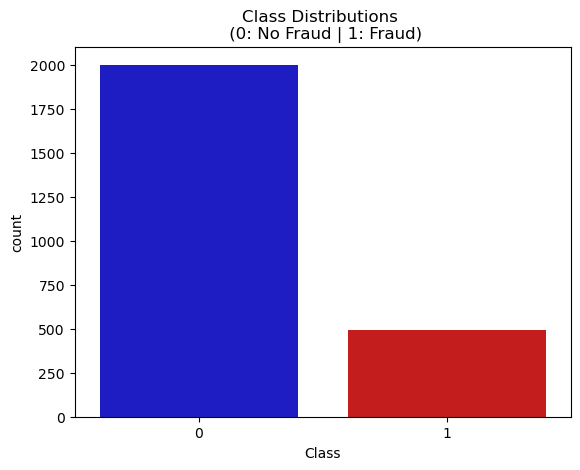

In [72]:
colors = ['#0101DF','#DF0101']
sns.countplot(x = y, palette=colors)
plt.title('Class Distributions \n (0: No Fraud | 1: Fraud)')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud | 1: Fraud)')

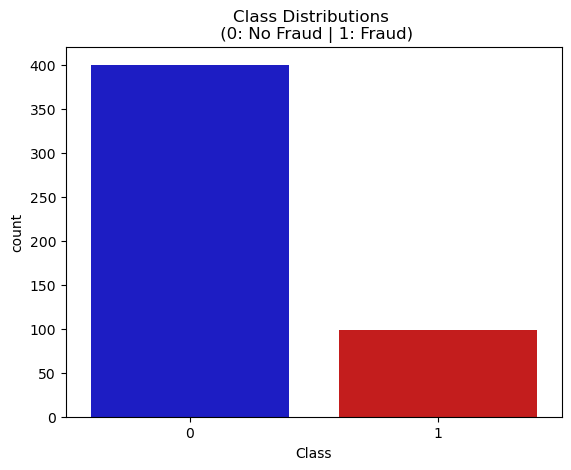

In [73]:
colors = ['#0101DF','#DF0101']
sns.countplot(x = y_test, palette=colors)
plt.title('Class Distributions \n (0: No Fraud | 1: Fraud)')

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud | 1: Fraud)')

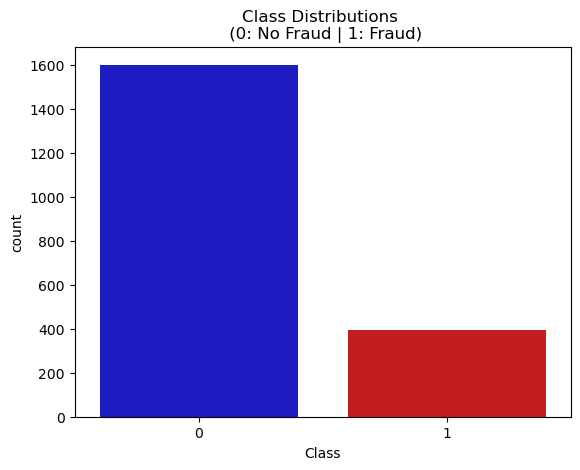

In [74]:
colors = ['#0101DF','#DF0101']
sns.countplot(x = y_train, palette=colors)
plt.title('Class Distributions \n (0: No Fraud | 1: Fraud)')

In [54]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [66]:
X_train_resampled.shape
X_test.shape

(499, 30)

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud | 1: Fraud)')

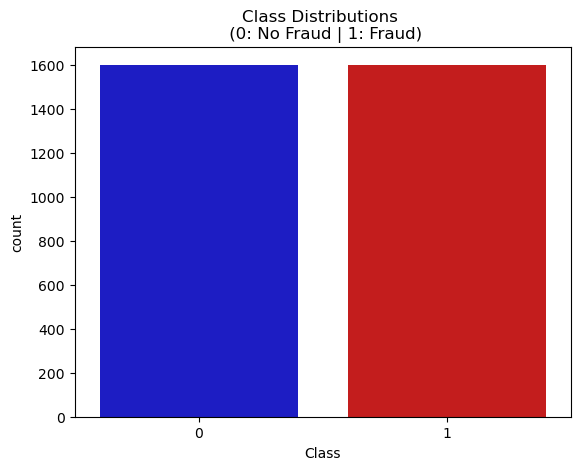

In [71]:
#plotting the imbalance in the dataset
colors = ['#0101DF','#DF0101']
sns.countplot(x = y_train_resampled, palette=colors)
plt.title('Class Distributions \n (0: No Fraud | 1: Fraud)')

In [55]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train_resampled, y_train_resampled)
    training_score = cross_val_score(classifier, X_train_resampled, y_train_resampled, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, 
          "Has a Accuracy of", round(training_score.mean(), 2) * 100, "%" )

Classifiers:  LogisticRegression Has a Accuracy of 94.0 %
Classifiers:  KNeighborsClassifier Has a Accuracy of 98.0 %
Classifiers:  SVC Has a Accuracy of 94.0 %
Classifiers:  DecisionTreeClassifier Has a Accuracy of 95.0 %
Classifiers:  XGBClassifier Has a Accuracy of 98.0 %
Classifiers:  RandomForestClassifier Has a Accuracy of 98.0 %


In [56]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train_resampled, y_train_resampled)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_params_
print("log_reg:", log_reg)

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train_resampled, y_train_resampled)
# KNears best estimator
knears_neighbors = grid_knears.best_params_
print("knear:", knears_neighbors)

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train_resampled, y_train_resampled)

# SVC best estimator
svc = grid_svc.best_params_
print("svc:",svc)
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train_resampled, y_train_resampled)

# tree best estimator
tree_clf = grid_tree.best_params_
print("tree: ",tree_clf)

# randomforest best estimator
random_forest_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_RF = GridSearchCV(RandomForestClassifier(), random_forest_params, cv=5, verbose=1, n_jobs=-1)
grid_RF.fit(X_train_resampled, y_train_resampled)
best_random_forest = grid_RF.best_params_
RF_class = grid_RF.best_params_
print("RF_class: ",RF_class)

# XGBoost best estimator
xgboost_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


grid_XG = GridSearchCV(XGBClassifier(), xgboost_params, cv=5, verbose=1, n_jobs=-1)
grid_XG.fit(X_train_resampled, y_train_resampled)
best_random_forest = grid_XG.best_params_
XG_class = grid_XG.best_params_
print("XG_class: ",XG_class)

log_reg: {'C': 10, 'penalty': 'l2'}
knear: {'algorithm': 'auto', 'n_neighbors': 2}
svc: {'C': 0.9, 'kernel': 'linear'}
tree:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF_class:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
XG_class:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}


In [57]:
ylog_pred = grid_log_reg.predict(X_test)
yknn_pred = grid_knears.predict(X_test)
ysvc_pred = grid_svc.predict(X_test)
ytree_pred = grid_tree.predict(X_test)
yRF_pred = grid_RF.predict(X_test)
yXG_pred = grid_XG.predict(X_test)

In [58]:
log_reg_accuracy = accuracy_score(y_test, ylog_pred)
KNN_accuracy = accuracy_score(y_test, yknn_pred)
svc_accuracy = accuracy_score(y_test, ysvc_pred)
tree_accuracy = accuracy_score(y_test, ytree_pred)
random_forest_accuracy = accuracy_score(y_test, yRF_pred)
xgboost_accuracy = accuracy_score(y_test, yXG_pred)

print(f'Logistic Regression Accuracy: {log_reg_accuracy}')
print(f'KNN_accuracy: {KNN_accuracy}')
print(f'svc_accuracy: {svc_accuracy}')
print(f'tree_accuracy : {tree_accuracy }')
print(f'Random Forest Accuracy: {random_forest_accuracy}')
print(f'XGBoost Accuracy: {xgboost_accuracy}')

Logistic Regression Accuracy: 0.9559118236472945
KNN_accuracy: 0.9639278557114228
svc_accuracy: 0.9579158316633266
tree_accuracy : 0.9158316633266533
Random Forest Accuracy: 0.9719438877755511
XGBoost Accuracy: 0.9639278557114228


In [59]:
report_XGBoost = classification_report(y_test, yXG_pred)

In [61]:
print(report_XGBoost)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       400
           1       0.91      0.91      0.91        99

    accuracy                           0.96       499
   macro avg       0.94      0.94      0.94       499
weighted avg       0.96      0.96      0.96       499



In [62]:
report_XGBoost = classification_report(y_test, yRF_pred)

In [63]:
print(report_XGBoost)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       400
           1       0.97      0.89      0.93        99

    accuracy                           0.97       499
   macro avg       0.97      0.94      0.95       499
weighted avg       0.97      0.97      0.97       499



In [82]:
from sklearn.metrics import roc_curve, auc

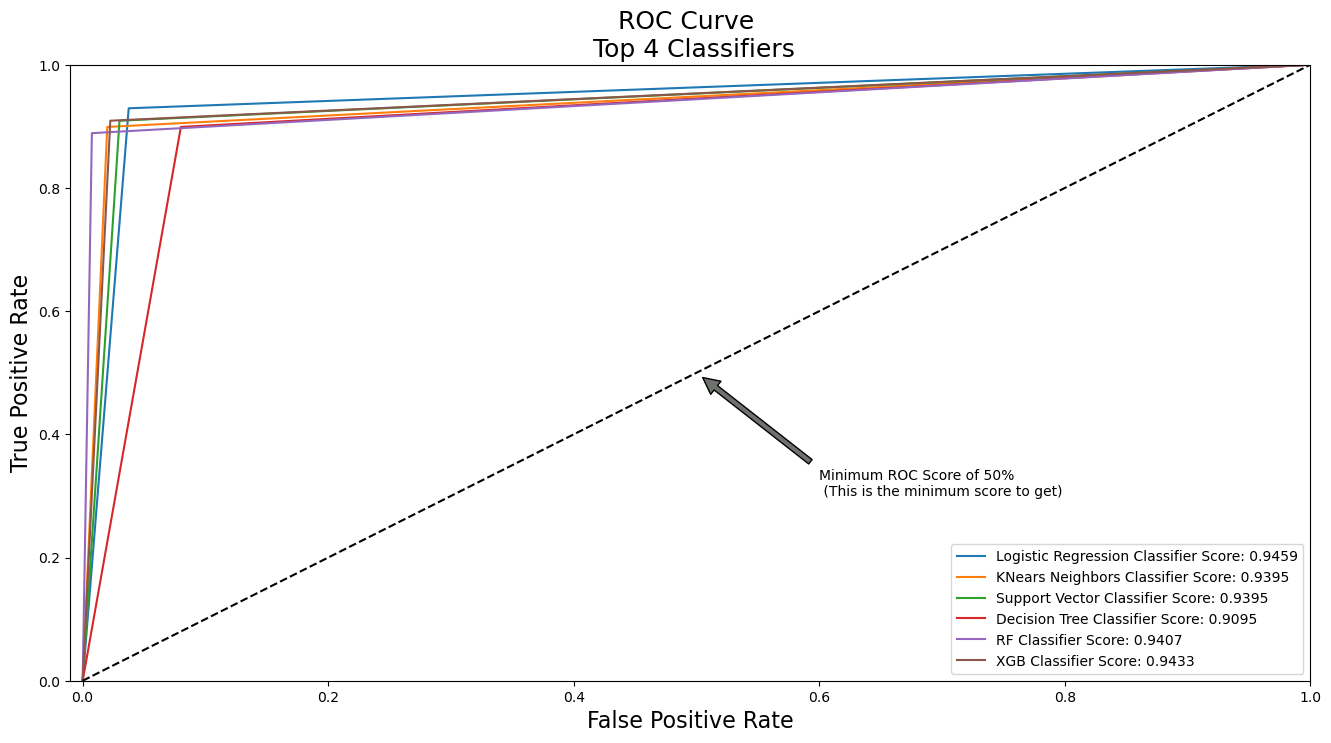

In [84]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, ylog_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, yknn_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, ysvc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, ytree_pred)
RF_fpr, RF_tpr, RF_threshold = roc_curve(y_test, yRF_pred)
XGB_fpr, XGB_tpr, XGB_threshold = roc_curve(y_test, yXG_pred)



def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,RF_fpr, RF_tpr,XGB_fpr, XGB_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ylog_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, yknn_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ysvc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ytree_pred)))
    plt.plot(RF_fpr, RF_tpr, label='RF Classifier Score: {:.4f}'.format(roc_auc_score(y_test, yRF_pred)))
    plt.plot(XGB_fpr, XGB_tpr, label='XGB Classifier Score: {:.4f}'.format(roc_auc_score(y_test, yXG_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,RF_fpr, RF_tpr,XGB_fpr, XGB_tpr)
plt.show()